#  Crop Recommendation — Model Training

This notebook trains machine learning models for the Crop Recommendation project.

It loads the preprocessed datasets, trains multiple models, evaluates them with several metrics, compares results, and saves the best model for deployment.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Environment & Notes

**Notes before running:**
- Make sure you ran the preprocessing notebook and that these files exist:
  - `../data/X_train.csv`
  - `../data/X_test.csv`
  - `../data/y_train.csv`
  - `../data/y_test.csv`
- Ensure the `../models/` directory exists (or the notebook will create it).
- This notebook will save the final model at `../models/crop_model.pkl`.

In [3]:
x_train=pd.read_csv('../data/X_train.csv')
x_test=pd.read_csv('../data/X_test.csv')
y_train=pd.read_csv('../data/Y_train.csv')
y_test=pd.read_csv('../data/Y_test.csv')
print('The Data has been loaded successfully!!')

The Data has been loaded successfully!!


In [4]:
# Train Decision Tree Classifier 
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
acc_dt=accuracy_score(y_test,y_pred)

print(f'Descision Tree Accurency:{acc_dt*100:.2f}%')

Descision Tree Accurency:97.95%


In [6]:
# Random Forest Classifier 
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(x_train,y_train.values.ravel())

y_pred=rf.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred)

print(f'Rndom Forest Classifier: {acc_rf*100:.2f} %')

Rndom Forest Classifier: 99.55 %


# Comparision Between 2 Models

C:\Users\ankit\AppData\Local\Temp\ipykernel_23468\3056527228.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Accuracy', palette='Greens')


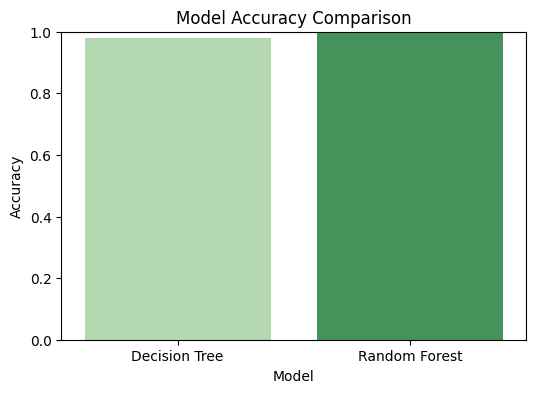


 Classification Report for Best Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

In [10]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc_dt, acc_rf]
})

plt.figure(figsize=(6,4))
sns.barplot(data=results, x='Model', y='Accuracy', palette='Greens')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()

print("\n Classification Report for Best Model (Random Forest):")
print(classification_report(y_test, y_pred))

# Saving the best Model 

In [11]:
best_model=rf if acc_rf>=acc_dt else dt

with open('../Models/crop_model.pkl','wb') as f:
    pickle.dump(best_model,f)

print('Best model saved successfully in the Models folder!!')

Best model saved successfully in the Models folder!!


### Summary
- Trained **Decision Tree** and **Random Forest** models  
- Compared accuracies visually  
- Saved the best-performing model (`crop_model.pkl`)  
- Ready for evaluation and tuning in the next step